In [3]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

from tensorflow.keras.datasets import mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
single_img = x_train[0]

In [8]:
single_img.shape

(28, 28)

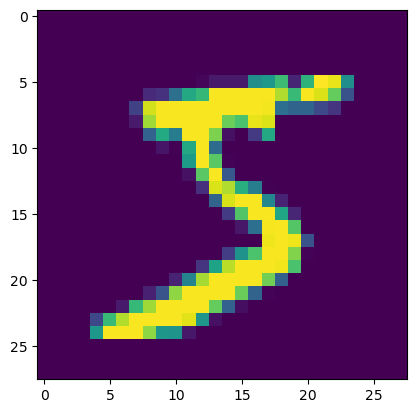

In [9]:
plt.imshow(single_img)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [17]:
single_img.max()

255

In [18]:
single_img.min()

0

In [19]:
# Future images should always have values between 0-255
# No need to use MinMaxScaler, can fit to an extent to training data, because test data is also an image
x_train = x_train/255
x_test = x_test/255

In [20]:
scaled_img = x_train[0]

In [21]:
scaled_img.max()

1.0

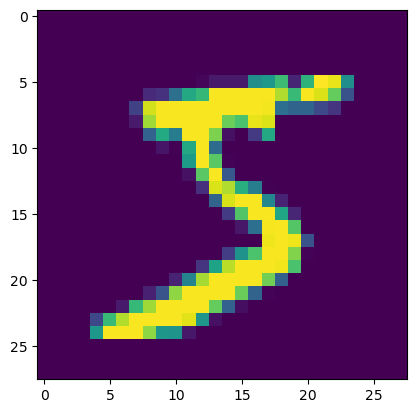

In [22]:
plt.imshow(scaled_img)

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [25]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import tensorflow.keras

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(2, 2))

model.add(Flatten())

model.add(Dense(128, activation="relu"))


model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

: 

: 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlyStop = EarlyStopping(monitor="val_loss", patience=1, verbose=1)

In [ ]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[earlyStop])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1416 - accuracy: 0.9589 - val_loss: 0.0707 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0482 - accuracy: 0.9846 - val_loss: 0.0437 - val_accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0391 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 4: early stopping


In [ ]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

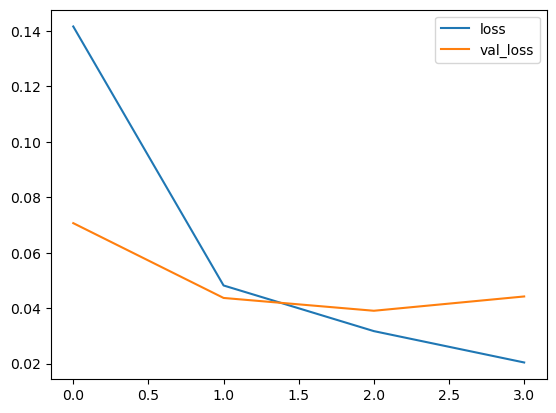

In [ ]:
metrics[["loss", "val_loss"]].plot()

<Axes: >

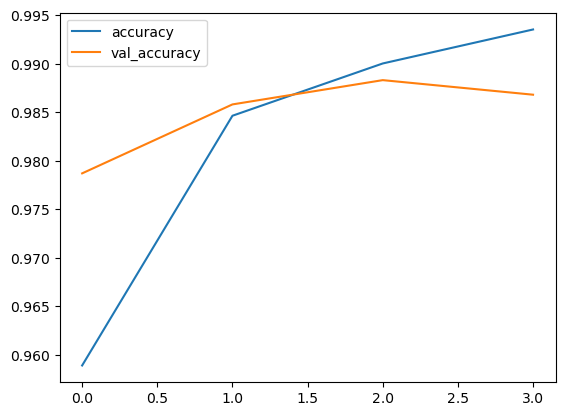

In [ ]:
metrics[["accuracy", "val_accuracy"]].plot()

In [ ]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.9868


[0.04423857852816582, 0.9868000149726868]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 8ms/step


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       1.00      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_test, predictions)

array([[ 975,    0,    1,    0,    0,    0,    1,    2,    1,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   2,    0, 1023,    1,    0,    0,    1,    3,    2,    0],
       [   0,    0,    3, 1001,    0,    1,    0,    2,    3,    0],
       [   0,    0,    0,    0,  979,    0,    0,    0,    0,    3],
       [   2,    0,    0,   11,    0,  868,    5,    0,    4,    2],
       [   8,    2,    0,    1,    4,    1,  939,    0,    3,    0],
       [   1,    1,    9,    1,    0,    0,    0, 1014,    1,    1],
       [   3,    0,    1,    0,    0,    0,    0,    0,  968,    2],
       [   3,    2,    3,    2,   13,    1,    0,    8,    9,  968]],
      dtype=int64)

In [ ]:
import seaborn as sns
from PIL import Image
import tensorflow as tf

<Axes: >

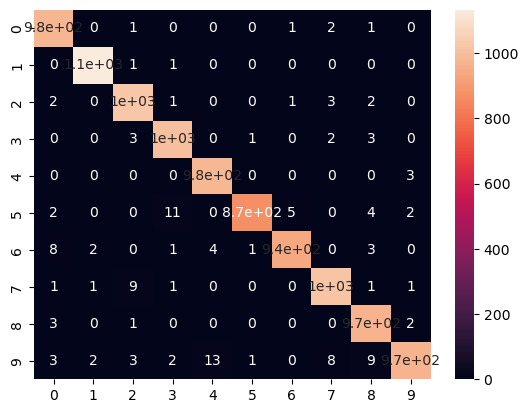

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [ ]:
mnist_num = x_test[0]
mnist_num.dtype

dtype('float64')

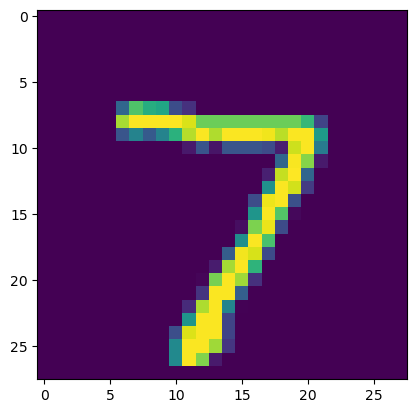

In [ ]:
plt.imshow(mnist_num.reshape(28, 28, 1))

In [ ]:
my_num = Image.open('/Users/Atiksh/OneDrive/Desktop/Coding/PACE_Java/output.png')
plt.imshow(my_num)

NameError: name 'Image' is not defined

In [ ]:
predictions = np.argmax(model.predict(mnist_num), axis=1)